## Import
Nous utiliserons une stack de Data Science habituelle : `numpy`, `pandas`, `sklearn`, `matplotlib`.

In [1]:
# manipulation des données
import numpy as np
import pandas as pd

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sklearn preprocessing pour le traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os
from os import listdir

# Suppression des alertes
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Data/3.normalized_dataset_image.csv')
path = '../Data/Flipkart/Images/'
data

,image_path,product_category_tree,label
0,aa68675f50a0551b8dadb954017a50a1.jpg,Kitchen & Dining,5
1,037c2402fee39fbc80433935711d1383.jpg,Home Furnishing,4
2,42643c1c9403f67921a18654bcf45ead.jpg,Baby Care,0
3,53f4bc7d7321f5c41de6b86e41f13e80.jpg,Home Decor & Festive Needs,3
4,b144a363c107c7bdd91f32d6e28ba6f2.jpg,Watches,6
...,...,...,...
1045,4e5ebfc871992e7e22365c0c036a1b89.jpg,Baby Care,0
1046,82fbc93cd45ab747e7e606f2c52c7335.jpg,Home Decor & Festive Needs,3
1047,216c6c3527984be3d7ad9023d5cd9bd1.jpg,Home Decor & Festive Needs,3
1048,f54d0c5cbd8e2270742293edf9075cb1.jpg,Home Furnishing,4


In [3]:
data['image_path'][0]

'aa68675f50a0551b8dadb954017a50a1.jpg'

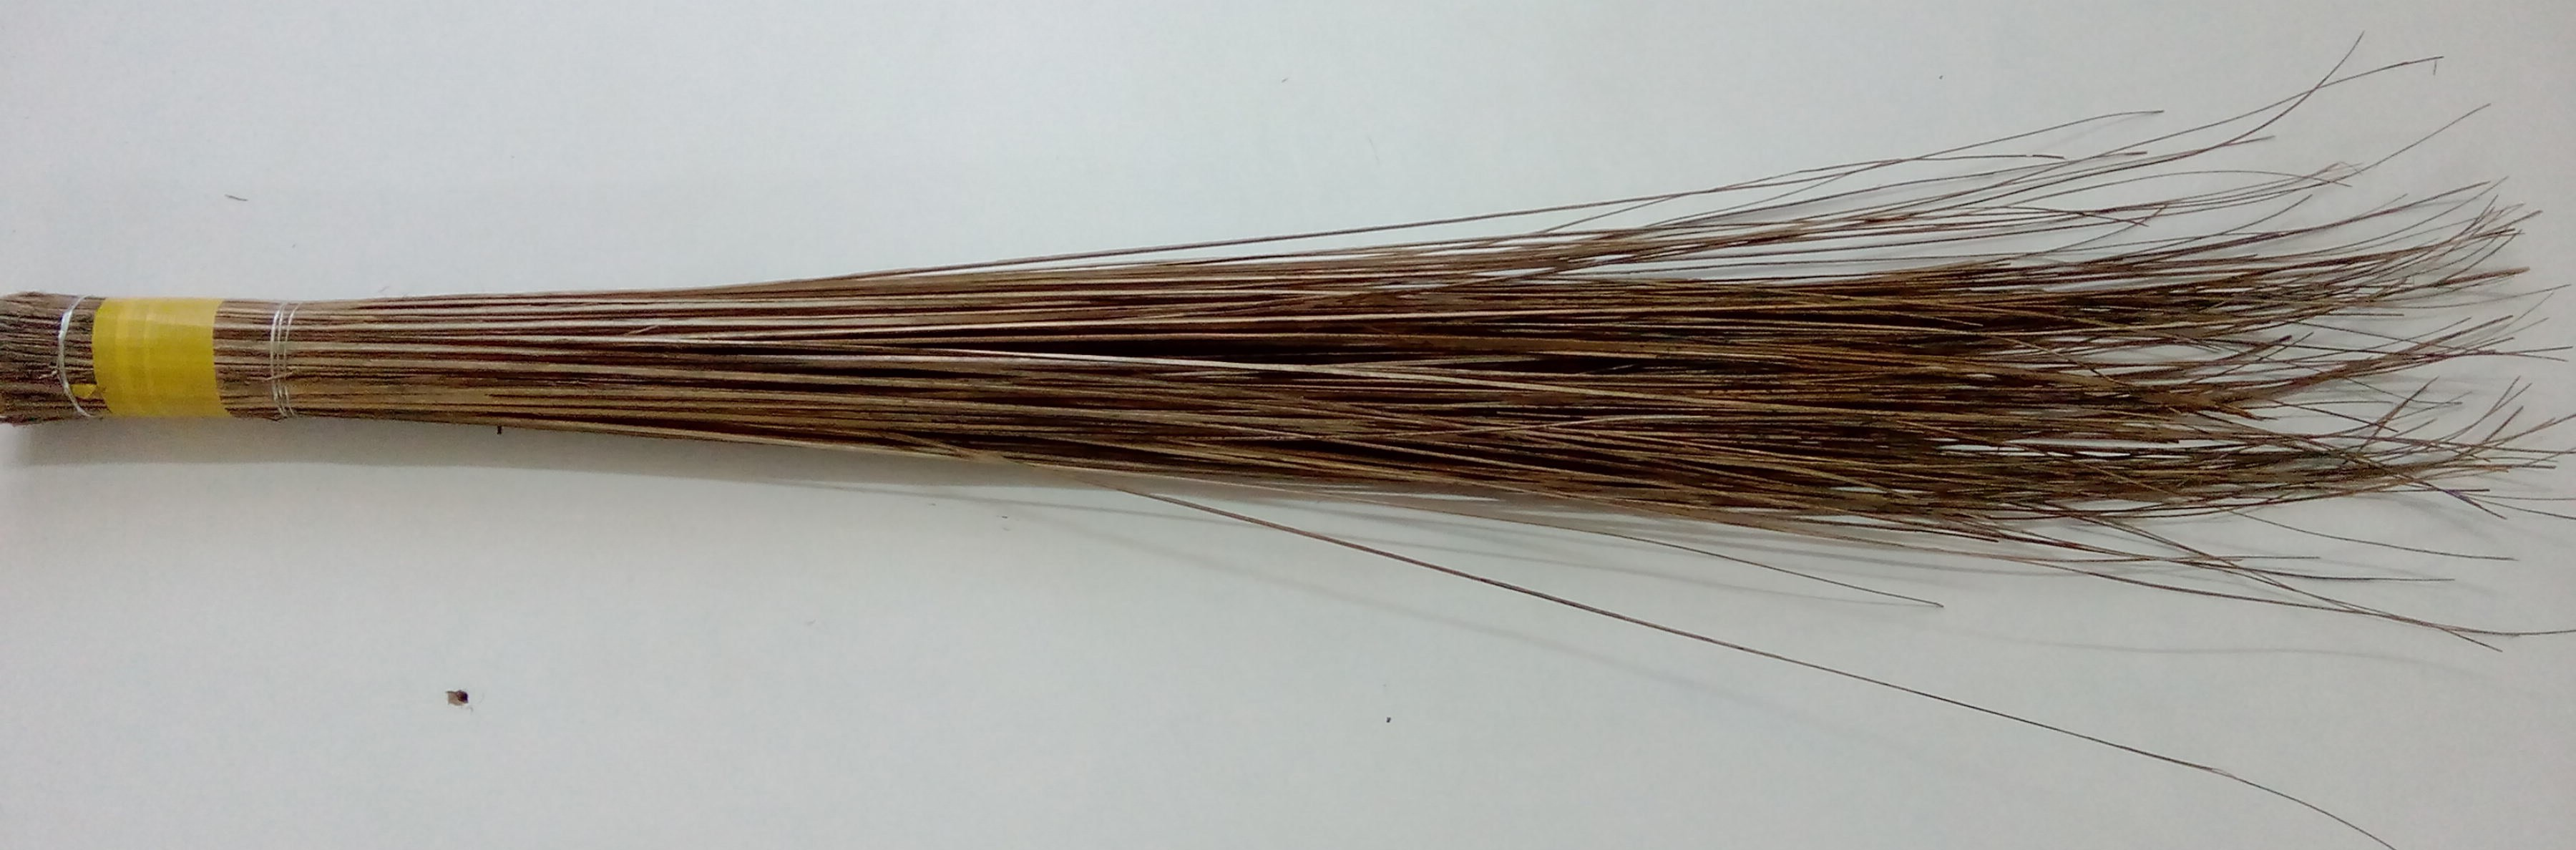

In [4]:
from IPython.display import Image, display
chemin_image = data['image_path'][0]
display(Image(filename=path+chemin_image))

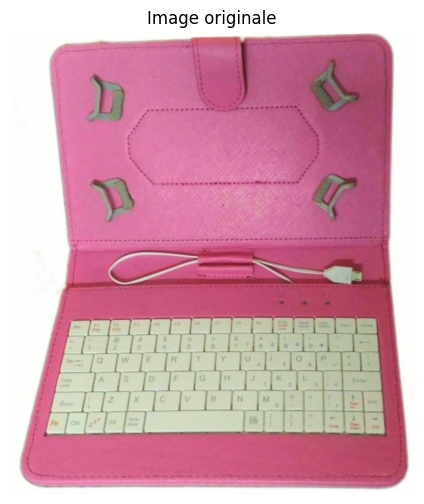

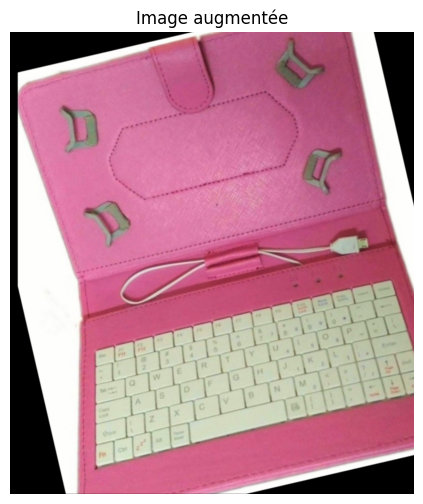

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = '../Data/Flipkart/Images/00e966a5049a262cfc72e6bbf68b80e7.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convertir en format RGB

# Afficher l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.title('Image originale')
plt.axis('off')
plt.show()

# Réaliser la data augmentation sur l'image
def augment_image(image):
    # Appliquer une rotation aléatoire entre -30 et 30 degrés
    angle = np.random.uniform(-30, 30)
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    augmented_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Appliquer une translation horizontale et verticale aléatoire
    tx = np.random.uniform(-20, 20)
    ty = np.random.uniform(-20, 20)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    augmented_image = cv2.warpAffine(augmented_image, translation_matrix, (cols, rows))

    # Appliquer un redimensionnement aléatoire entre 0.8 et 1.2
    scale_factor = np.random.uniform(0.8, 1.2)
    augmented_image = cv2.resize(augmented_image, None, fx=scale_factor, fy=scale_factor)

    # Afficher l'image augmentée
    plt.figure(figsize=(6, 6))
    plt.imshow(augmented_image)
    plt.title('Image augmentée')
    plt.axis('off')
    plt.show()

# Appliquer la data augmentation à l'image originale
augment_image(original_image)


- je dois d'abord réaliser une extraction des images que je vais utiliser
- récupérer le label de l'image modifié, ajouter un individu a mon dataframe
- effectuer une opération de modification sur l'image parmis différentes possibilités de modification
- enregistrer l'image avec un nouvelle identifiant et conserver cette identifiant dans mon tableau, 

- et par la suite je dois entrainer mon modèle tout le tintouin

In [10]:
source_file = '../Data/Flipkart/Images/'
goal_file = '../Data/AugmentedImages/'

def augmented1(image):
    angle = np.random.uniform(-30, 30)
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    augmented_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Afficher l'image augmentée
    plt.figure(figsize=(6, 6))
    plt.imshow(augmented_image)
    plt.title('Image augmentée')
    plt.axis('off')
    plt.show()


def augmented2(image):
    tx = np.random.uniform(-150, 150)
    ty = np.random.uniform(-150, 150)
    rows, cols, _ = image.shape
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    augmented_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

    # Afficher l'image augmentée
    plt.figure(figsize=(6, 6))
    plt.imshow(augmented_image)
    plt.title('Image augmentée')
    plt.axis('off')
    plt.show()

def augmented3(image):
    y=0
    x=0
    h=int((image.shape[1])/2)
    w=int((image.shape[0])/2)
    augmented_image = image[x:w, y:h]
    #cv2.imshow("Cropped", crop_image)

    # Afficher l'image augmentée
    plt.imshow(augmented_image)
    plt.title('Image augmentée')
    plt.axis('off')
    plt.show()

def augmented4(image):

    augmented_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en format RGB
    cv2.imwrite(goal_file, augmented_image)

    # Afficher l'image augmentée
    plt.imshow(augmented_image)
    plt.title('Image augmentée')
    plt.axis('off')
    plt.show()

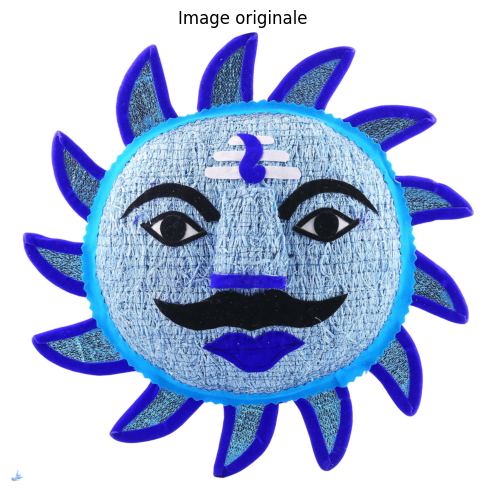

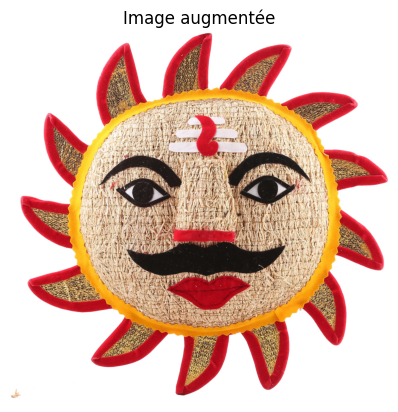

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = '../Data/Flipkart/Images/216c6c3527984be3d7ad9023d5cd9bd1.jpg'
original_image = cv2.imread(image_path)
#original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convertir en format RGB

# Afficher l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.title('Image originale')
plt.axis('off')
plt.show()

augmented4(original_image)

In [16]:
testX = original_image.shape
print(testX)
print(testX[0])

(1100, 962, 3)
1100
